# Spam detection
The main aim of this project is to build a machine learning classifier that is able to automatically detect 
spammy articles, based on their content. 

In [1]:
! sh bootstrap.sh

    100% |████████████████████████████████| 18.7MB 80kB/s 
    100% |████████████████████████████████| 14.7MB 103kB/s 
    100% |████████████████████████████████| 194kB 7.0MB/s 
    100% |████████████████████████████████| 61kB 11.7MB/s 
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [25]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.cross_validation import KFold
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
%matplotlib inline

In [32]:
#Load testing dataset 
df_test = pd.read_csv("enwiki.draft_quality.50k_stratified.feature_labels.tsv", sep="\t")

#Replace strings with integers : 1 for OK and 0 for Not OK
df_test["draft_quality"] = df_test["draft_quality"].replace({"OK" : 1, "vandalism" : 0, "spam" : 0, "attack" : 0})
#Put features and labels on differents dataframes
X_test=df_test.drop(["draft_quality"], 1)
Y_test=df_test["draft_quality"]

# Loading training dataset 
df_train = pd.read_csv("enwiki.draft_quality.201608-201701.feature_labels.tsv", sep="\t")
df_train["draft_quality"] = df_train["draft_quality"].replace({"OK" : 1, "vandalism" : 0, "spam" : 0, "attack" : 0})
X_train=df_train.drop(["draft_quality"], 1)
Y_train=df_train["draft_quality"]

# Converting dataframes to array
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [33]:
#lenghts of boths datasets
print("Test set length: %d" % len(X_test))
print("Train set length: %d" % len(X_train))

Test set length: 52518
Train set length: 324570


# Custom Helper Function Definitions

In [12]:
from sklearn.metrics import roc_curve, auc

In [26]:
# Compute ROC curve and ROC area 
def compute_roc_and_auc(y_predict, y_true):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_predict, y_true)
    roc_auc = auc(fpr, tpr)
    return roc_auc, fpr, tpr

# Plot of a ROC curve
def plot_roc(roc_auc, fpr, tpr): 
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Modeling
We tried out various models and selected the best performing models (with the best performing parameter settings for each model). At the end, we retained 3 models which are:
1.	Naïve Bayes Gaussian
2.	Random forest
3.	Logistic regression

#### Naïve Bayes Gaussian

In [34]:
weights=np.array([0.7,1-0.7])
clf = BernoulliNB(alpha=22, class_prior=weights)
clf.fit(X_train, Y_train)
prediction_nb=clf.predict(X_test)
confusion=confusion_matrix(Y_test, prediction_nb, labels=None)
print(confusion)
recall=confusion[0,0]/(confusion[0,0]+confusion[0,1])
precision=confusion[0,0]/(confusion[0,0]+confusion[1,0])
print("Over all the not-OK articles included in the dataset, we detect:")
print(recall)
print("Over all the articles predicted as being not-OK, only this proportion is really not-OK:")
print(precision)

[[23797  2464]
 [ 2681 23576]]
Over all the not-OK articles included in the dataset, we detect:
0.90617265146
Over all the articles predicted as being not-OK, only this proportion is really not-OK:
0.898746128862


In [35]:
roc_auc, fpr, tpr = compute_roc_and_auc(prediction_nb, Y_test)

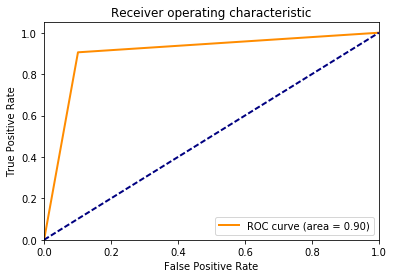

None


In [36]:
print (plot_roc(roc_auc, fpr, tpr))

#### logistic regression

In [37]:
clf2 = LogisticRegression(penalty='l1', random_state=0, class_weight={1:0.1, 0: 0.9})
clf2.fit(X_train, Y_train)
prediction_lr=clf2.predict(X_test)
confusion=confusion_matrix(Y_test, prediction_lr, labels=None)
print(confusion)
recall=confusion[0,0]/(confusion[0,0]+confusion[0,1])
precision=confusion[0,0]/(confusion[0,0]+confusion[1,0])
print("Over all the not-OK articles included in the dataset, we detect:")
print(recall)
print("Over all the articles predicted as being not-OK, only this proportion is really not-OK:")
print(precision)

[[22936  3325]
 [ 1095 25162]]
Over all the not-OK articles included in the dataset, we detect:
0.873386390465
Over all the articles predicted as being not-OK, only this proportion is really not-OK:
0.954433856269


In [38]:
roc_auc, fpr, tpr = compute_roc_and_auc(prediction_lr, Y_test)

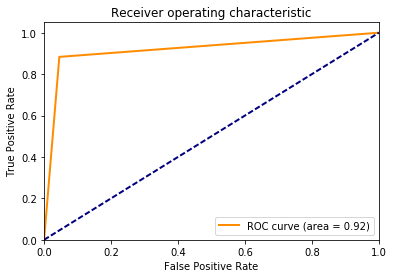

None


In [39]:
print (plot_roc(roc_auc, fpr, tpr))

#### random forest

In [40]:
clf3 = RandomForestClassifier(n_jobs=16, n_estimators=2, min_samples_leaf=1, random_state=25, class_weight={1:0.9, 0: 0.1})
clf3.fit(X_train, Y_train)
prediction_rf=clf3.predict(X_test)
confusion=confusion_matrix(Y_test, prediction_rf, labels=None)
print(confusion)
recall=confusion[0,0]/(confusion[0,0]+confusion[0,1])
precision=confusion[0,0]/(confusion[0,0]+confusion[1,0])
print("Over all the not-OK articles included in the dataset, we detect:")
print(recall)
print("Over all the articles predicted as being not-OK, only this proportion is really not-OK:")
print(precision)

[[18530  7731]
 [  816 25441]]
Over all the not-OK articles included in the dataset, we detect:
0.705609078101
Over all the articles predicted as being not-OK, only this proportion is really not-OK:
0.957820738137


In [69]:
roc_auc, fpr, tpr = compute_roc_and_auc(prediction_rf, Y_test)

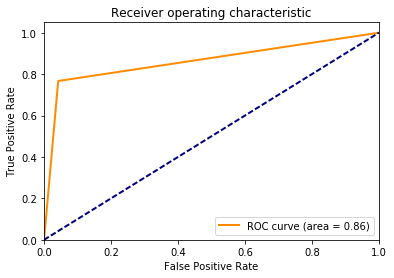

None


In [70]:
print (plot_roc(roc_auc, fpr, tpr))

## Combination 1
We decided to try combining these models in order to construct a better and more consistent one.

### voting system

In [44]:
#Here we construct our voting function
def voting(pred1, pred2, pred3):
    final_prediction=np.zeros_like(pred1)
    for i in range(len(pred1)):
        if pred1[i]==pred2[i]:
            final_prediction[i]=pred1[i]
        elif pred1[i]==pred3[i]:
            final_prediction[i]=pred1[i]
        elif pred2[i]==pred3[i]:
            final_prediction[i]=pred2[i]
    return final_prediction

In [46]:
#Here we make the prediction using voting function (with the three models defined above)
prediction= voting(prediction_lr, prediction_nb, prediction_rf)
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(Y_test, prediction, labels=None)
print(confusion)
recall=confusion[0,0]/(confusion[0,0]+confusion[0,1])
precision=confusion[0,0]/(confusion[0,0]+confusion[1,0])
print("Over all the not-OK articles included in the dataset, we detect:")
print(recall)
print("Over all the articles predicted as being not-OK, only this proportion is really not-OK:")
print(precision)

[[23013  3248]
 [ 1077 25180]]
Over all the not-OK articles included in the dataset, we detect:
0.876318495107
Over all the articles predicted as being not-OK, only this proportion is really not-OK:
0.955292652553


In [47]:
roc_auc, fpr, tpr = compute_roc_and_auc(prediction, Y_test)

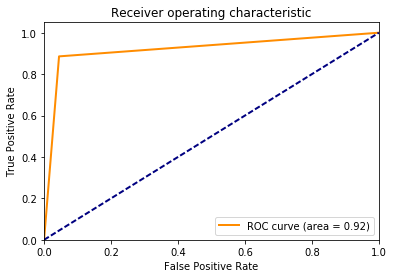

None


In [48]:
print (plot_roc(roc_auc, fpr, tpr))

### customizing

In [50]:
#Since we are interested in negatives (not-OK) we will analyze how many times a model detects a not-OK article while
#the others don't
def get_missclasified_indexes(pred1, Y_true, Class):
    index_list=[]
    a=0
    b=1
    if Class=="negative":
        a=1
        b=0  
    for i in range(len(pred1)):
        if pred1[i]==a and Y_true[i]==b:
            index_list.append(i)
    return index_list

In [52]:
false_negative_indexes=get_missclasified_indexes(prediction, Y_test, "negative")
print(len(prediction[false_negative_indexes]))
print(np.sum(prediction_nb[false_negative_indexes]!=prediction[false_negative_indexes]))
print(np.sum(prediction_rf[false_negative_indexes]!=prediction[false_negative_indexes]))
print(np.sum(prediction_lr[false_negative_indexes]!=prediction[false_negative_indexes]))

3248
1128
245
551


In [53]:
##Here we define our function based on the results above
def voting_customized(pred1, pred2, pred3):
    final_prediction=np.zeros_like(pred1)
    for i in range(len(pred1)):
        if pred1[i]==0:
            final_prediction[i]=0
        else:
            final_prediction[i]=pred3[i]
    return final_prediction

In [55]:
#making a prediction with our new function
prediction= voting_customized(prediction_lr, prediction_nb, prediction_rf)
confusion=confusion_matrix(Y, prediction, labels=None)
print(confusion)
recall=confusion[0,0]/(confusion[0,0]+confusion[0,1])
precision=confusion[0,0]/(confusion[0,0]+confusion[1,0])
print("Over all the not-OK articles included in the dataset, we detect:")
print(recall)
print("Over all the articles predicted as being not-OK, only this proportion is really not-OK:")
print(precision)

[[23809  2452]
 [ 1385 24872]]
Over all the not-OK articles included in the dataset, we detect:
0.906629602833
Over all the articles predicted as being not-OK, only this proportion is really not-OK:
0.945026593633


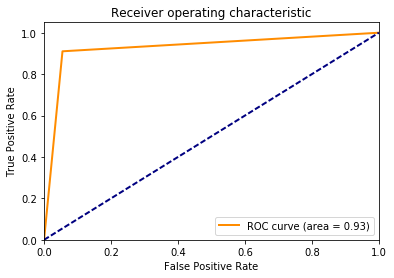

None


In [56]:
roc_auc, fpr, tpr = compute_roc_and_auc(prediction, Y_test)
print (plot_roc(roc_auc, fpr, tpr))

In [14]:
false_negative_indexes=get_missclasified_indexes(prediction, Y, "negative")
print(len(prediction[false_negative_indexes]))
print(np.sum(prediction_nb[false_negative_indexes]!=prediction[false_negative_indexes]))
print(np.sum(prediction_rf[false_negative_indexes]!=prediction[false_negative_indexes]))
print(np.sum(prediction_lr[false_negative_indexes]!=prediction[false_negative_indexes]))

2452
1128
0
0


Here you can see that benefited from the good behavior of the logistic regression and the random forest. By contrast,
we couldn't do the same with the naive bayse, because, this makes as missclassify a lot of OK articles, which leads to
a low precision.

## Combination 2
Now, we would like the capture more of the not-OK articles. To this end, we decided to include a few false positives 
in the training datasets. In order so in an intelligent way and to select some representative samples, we first 
analyzed these false positives. 

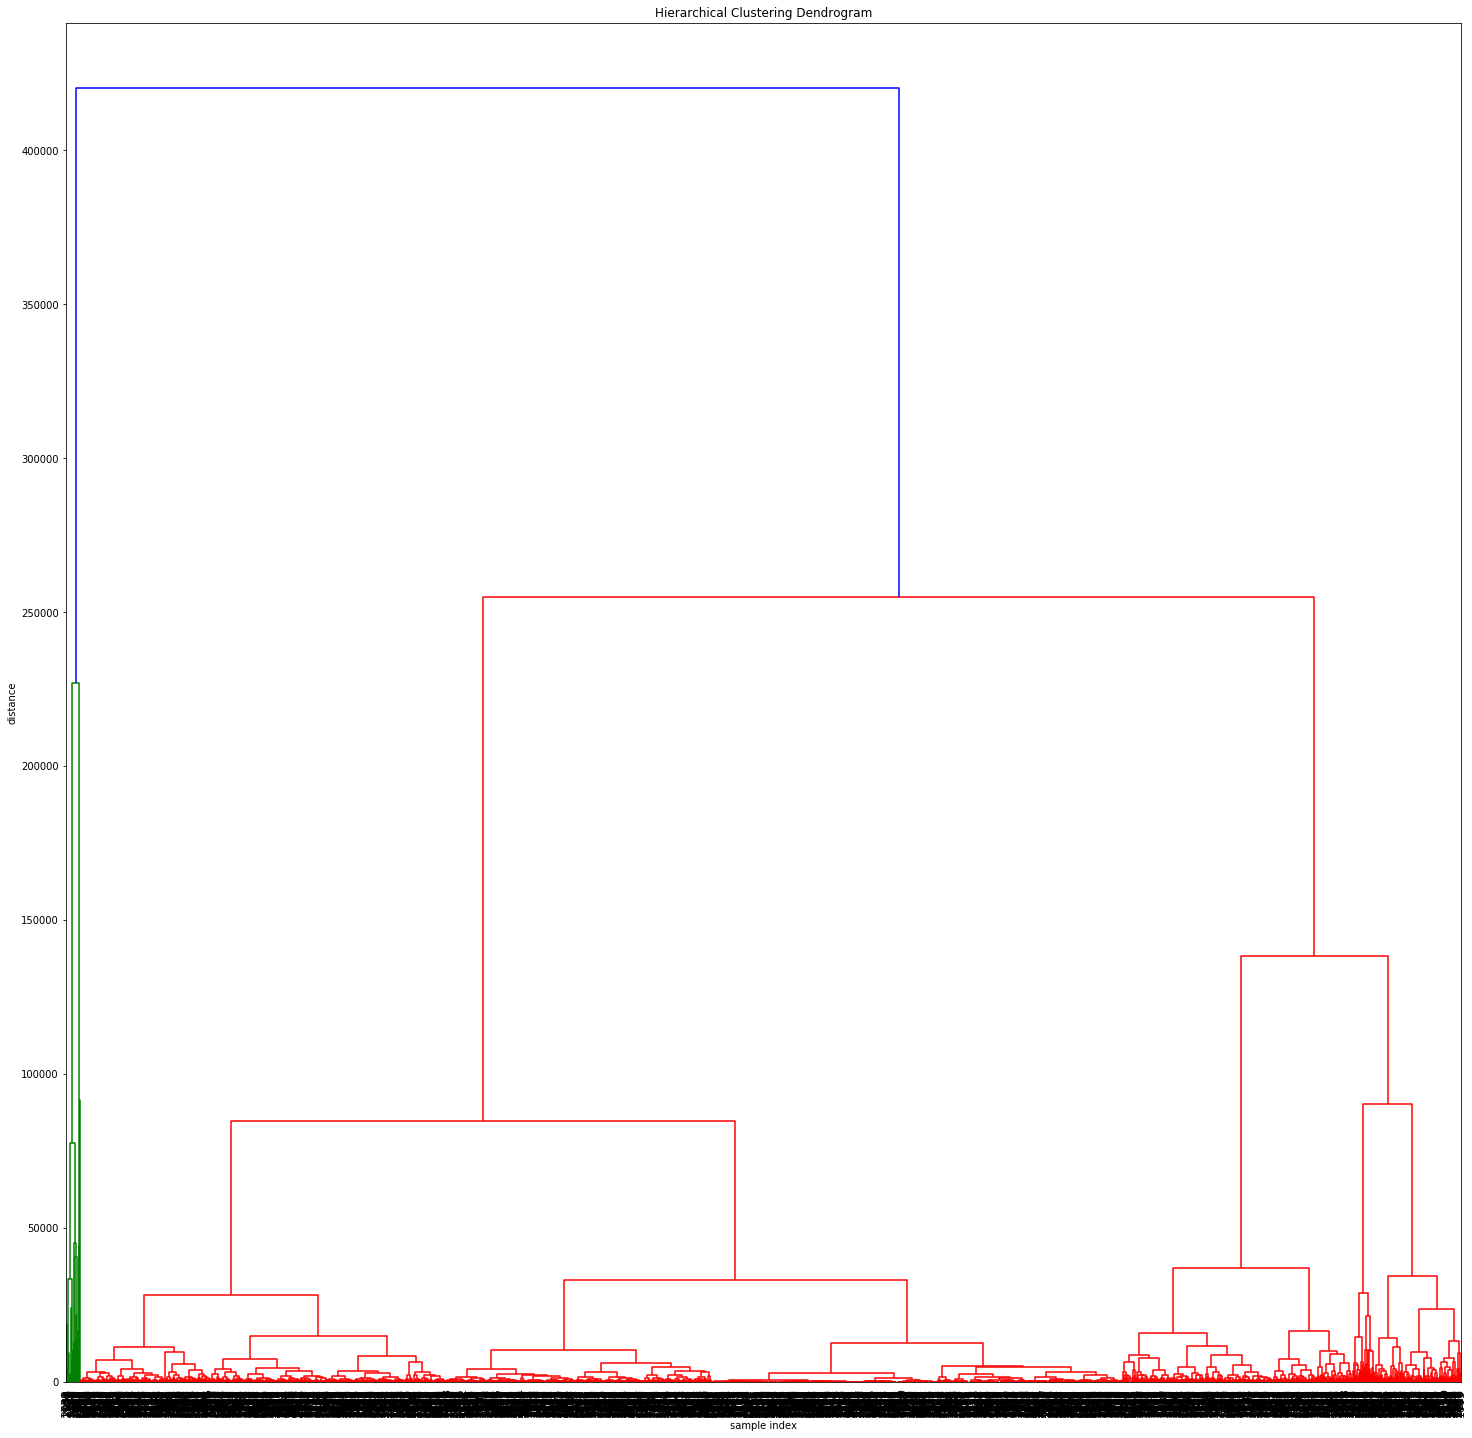

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X[false_negative_indexes], 'ward')
plt.figure(figsize=(25, 25))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90., 
    leaf_font_size=11.,  
)
plt.show()

This means that we have two big clusters of false positives (green and red). We have chosen to pick up 
randomly 50 samples of each cluster. 

In [58]:
#we perform a kmeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(X[false_negative_indexes])
cluster_labels=kmeans.labels_
print(cluster_labels)
print(np.unique(cluster_labels))

[0 0 0 ..., 0 0 0]
[0 1]


In [65]:
#Picking up the sapmles from theclusters and adding them to the training dataset.

false_negatives_cluster0=[]
false_negatives_cluster1=[]

for i in range(1,11):
    random.seed(a=i)
    false_negatives_cluster0.append(random.choice([w for index_w, w in enumerate(false_negative_indexes) if cluster_labels[index_w] == 0]))
for i in range(1,11):
    random.seed(a=i)
    false_negatives_cluster1.append(random.choice([w for index_w, w in enumerate(false_negative_indexes) if cluster_labels[index_w] == 1]))


#adding 1st cluster's samples
Y_train=np.reshape(np.dstack(Y_train), (len(Y_train),1))
temp_arr=np.array([Y_test[false_negatives_cluster0]])
temp_arr=np.reshape(np.dstack(temp_arr), (10,1))

X_train_new = np.vstack((X_train, X_test[false_negatives_cluster0]))
Y_train_new=np.vstack((Y_train, temp_arr))
# Second
temp_arr2=np.array([Y_test[false_negatives_cluster1]])
temp_arr2=np.reshape(np.dstack(temp_arr2), (10,1))

X_train_new = np.vstack((X_train_new, X_test[false_negatives_cluster1]))
Y_train_new=np.vstack((Y_train_new, temp_arr2))

Y_train_new=np.reshape(np.dstack(Y_train_new), (len(Y_train_new),))
X_train = X_train_new
Y_train = Y_train_new

### Now we do the prediction again

#### random forest

In [67]:
clf3.fit(X_train, Y_train)
prediction_rf_new=clf3.predict(X_test)
confusion=confusion_matrix(Y_test, prediction_rf_new, labels=None)
print(confusion)
recall=confusion[0,0]/(confusion[0,0]+confusion[0,1])
precision=confusion[0,0]/(confusion[0,0]+confusion[1,0])
print("Over all the not-OK articles included in the dataset, we detect:")
print(recall)
print("Over all the articles predicted as being not-OK, only this proportion is really not-OK:")
print(precision)


[[18848  7413]
 [  813 25444]]
Over all the not-OK articles included in the dataset, we detect:
0.717718289479
Over all the articles predicted as being not-OK, only this proportion is really not-OK:
0.958649102284


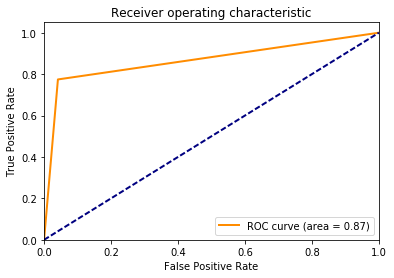

None


In [68]:
roc_auc, fpr, tpr = compute_roc_and_auc(prediction_rf_new, Y_test)
print (plot_roc(roc_auc, fpr, tpr))

#### logistic regression

In [71]:
clf2.fit(X_train, Y_train)
prediction_lr_new=clf2.predict(X_test)
confusion=confusion_matrix(Y_test, prediction_lr_new, labels=None)
print(confusion)
recall=confusion[0,0]/(confusion[0,0]+confusion[0,1])
precision=confusion[0,0]/(confusion[0,0]+confusion[1,0])
print("Over all the not-OK articles included in the dataset, we detect:")
print(recall)
print("Over all the articles predicted as being not-OK, only this proportion is really not-OK:")
print(precision)

[[22929  3332]
 [ 1094 25163]]
Over all the not-OK articles included in the dataset, we detect:
0.873119835498
Over all the articles predicted as being not-OK, only this proportion is really not-OK:
0.954460308871


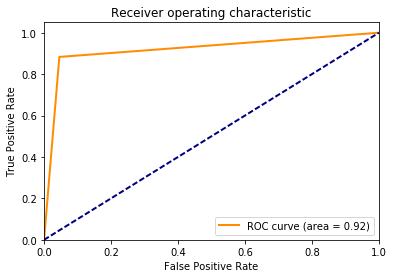

None


In [72]:
roc_auc, fpr, tpr = compute_roc_and_auc(prediction_lr_new, Y_test)
print (plot_roc(roc_auc, fpr, tpr)) 

#### Naive Bayse

In [74]:
from sklearn.naive_bayes import BernoulliNB
weights=np.array([0.7,1-0.7])
clf = BernoulliNB(alpha=22, class_prior=weights)
clf.fit(X_train, Y_train)
prediction_nb_new=clf.predict(X_test)
confusion=confusion_matrix(Y_test, prediction_nb_new, labels=None)
print(confusion)
recall=confusion[0,0]/(confusion[0,0]+confusion[0,1])
precision=confusion[0,0]/(confusion[0,0]+confusion[1,0])
print("Over all the not-OK articles included in the dataset, we detect:")
print(recall)
print("Over all the articles predicted as being not-OK, only this proportion is really not-OK:")
print(precision)

[[23809  2452]
 [ 2699 23558]]
Over all the not-OK articles included in the dataset, we detect:
0.906629602833
Over all the articles predicted as being not-OK, only this proportion is really not-OK:
0.898181681002


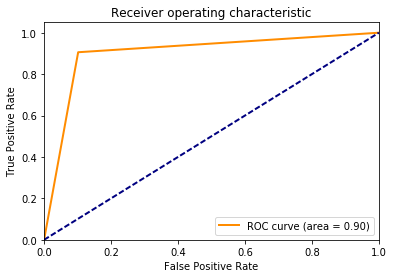

None


In [75]:
roc_auc, fpr, tpr = compute_roc_and_auc(prediction_nb_new, Y_test)
print (plot_roc(roc_auc, fpr, tpr)) 

#### Voting

In [82]:
prediction= voting(prediction_lr_new, prediction_nb_new, prediction_rf_new)
confusion=confusion_matrix(Y_test, prediction, labels=None)
print(confusion)
recall=confusion[0,0]/(confusion[0,0]+confusion[0,1])
precision=confusion[0,0]/(confusion[0,0]+confusion[1,0])
print("Over all the not-OK articles included in the dataset, we detect:")
print(recall)
print("Over all the articles predicted as being not-OK, only this proportion is really not-OK:")
print(precision)

[[23086  3175]
 [ 1064 25193]]
Over all the not-OK articles included in the dataset, we detect:
0.879098282624
Over all the articles predicted as being not-OK, only this proportion is really not-OK:
0.955942028986


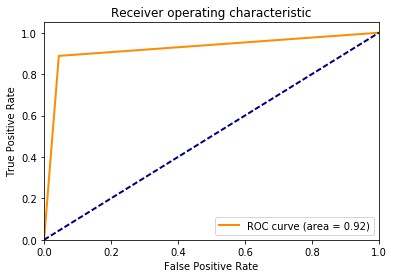

None


In [83]:
roc_auc, fpr, tpr = compute_roc_and_auc(prediction, Y_test)
print (plot_roc(roc_auc, fpr, tpr)) 

#### Customizing

In [84]:
def voting_customized2(pred1, pred2, pred3):
    final_prediction=np.zeros_like(pred1)
    for i in range(len(pred1)):
        if pred1[i]==0:
            final_prediction[i]=0     
        else:
            final_prediction[i]=pred2[i]
    return final_prediction

In [86]:
prediction= voting_customized2(prediction_lr_new, prediction_nb_new, prediction_rf_new)
confusion=confusion_matrix(Y, prediction, labels=None)
print(confusion)
recall=confusion[0,0]/(confusion[0,0]+confusion[0,1])
precision=confusion[0,0]/(confusion[0,0]+confusion[1,0])
print("Over all the not-OK articles included in the dataset, we detect:")
print(recall)
print("Over all the articles predicted as being not-OK, only this proportion is really not-OK:")
print(precision)

[[24690  1571]
 [ 2886 23371]]
Over all the not-OK articles included in the dataset, we detect:
0.94017744945
Over all the articles predicted as being not-OK, only this proportion is really not-OK:
0.895343777198


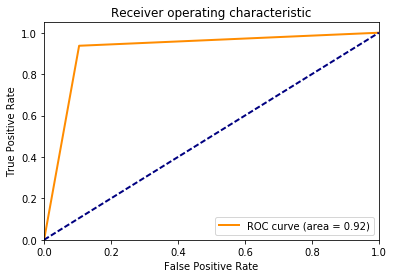

None


In [87]:
roc_auc, fpr, tpr = compute_roc_and_auc(prediction, Y_test)
print (plot_roc(roc_auc, fpr, tpr)) 